In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [42]:
df = pd.read_csv('Company_data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [43]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['sales', 'compprice', 'income', 'advertising', 'population', 'price',
       'shelveloc', 'age', 'education', 'urban', 'us'],
      dtype='object')

In [44]:
print(df.shape)
df.info()

(400, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales        400 non-null    float64
 1   compprice    400 non-null    int64  
 2   income       400 non-null    int64  
 3   advertising  400 non-null    int64  
 4   population   400 non-null    int64  
 5   price        400 non-null    int64  
 6   shelveloc    400 non-null    object 
 7   age          400 non-null    int64  
 8   education    400 non-null    int64  
 9   urban        400 non-null    object 
 10  us           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [45]:
df.describe()

,sales,compprice,income,advertising,population,price,age,education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


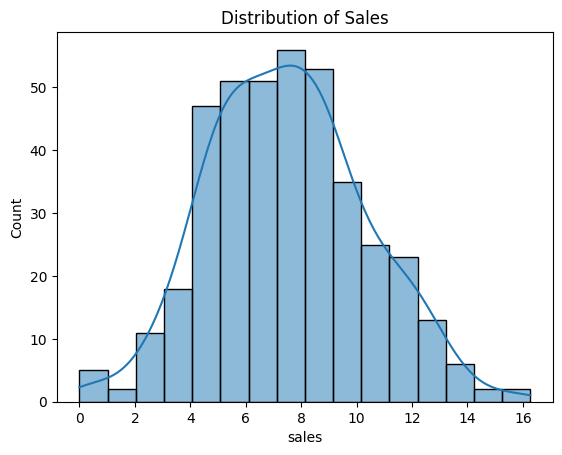

In [46]:
sns.histplot(df['sales'],kde=True)
plt.title('Distribution of Sales')
plt.savefig('company_sales_distribution.png')
plt.show()

In [47]:
for col in ['shelveloc','urban','us']:
    print(df[col].value_counts())
    print('-'*30)

shelveloc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64
------------------------------
urban
Yes    282
No     118
Name: count, dtype: int64
------------------------------
us
Yes    258
No     142
Name: count, dtype: int64
------------------------------


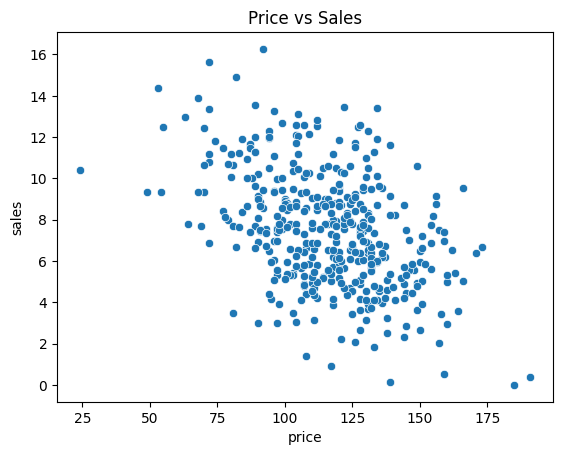

In [48]:
sns.scatterplot(x='price',y='sales',data=df)
plt.title('Price vs Sales')
plt.show()

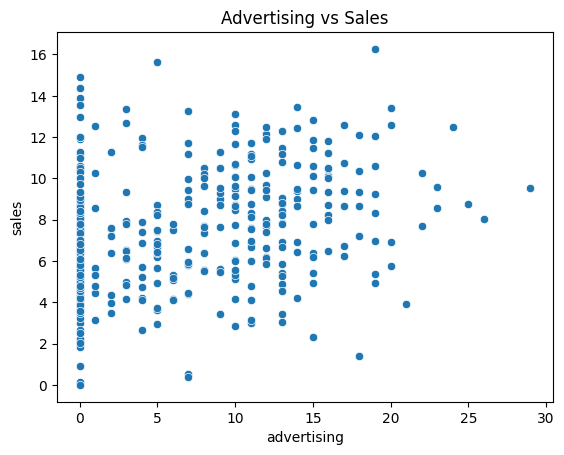

In [49]:
sns.scatterplot(x='advertising',y='sales',data=df)
plt.title('Advertising vs Sales')
plt.show()

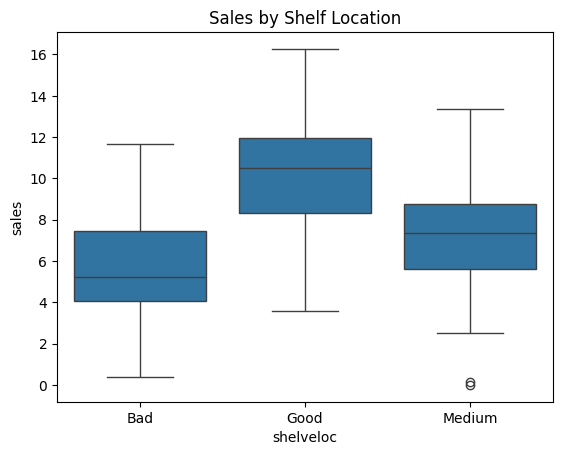

In [50]:
sns.boxplot(x='shelveloc',y='sales',data=df)
plt.title('Sales by Shelf Location')
plt.savefig('shelf_location_sales.png')
plt.show()

In [51]:
q1 = df['sales'].quantile(0.4)
q2 = df['sales'].quantile(0.6)

df = df[(df['sales'] <= q1) | (df['sales']>=q2)]

df['sales_cat'] = df['sales'].apply(
    lambda x: 'Low' if x<=q1 else 'High'
)

In [52]:
df['sales_cat'].value_counts()

sales_cat
High    160
Low     160
Name: count, dtype: int64

In [53]:
df_encoded = pd.get_dummies(
    df,
    columns = ['shelveloc','urban','us'],
    drop_first=True
)

In [54]:
X = df_encoded.drop(['sales','sales_cat'],axis=1)
y = df_encoded['sales_cat']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [56]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_split=10,
    random_state=42
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [57]:
y_pred = rf_model.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.921875

In [59]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Low','High'],
            yticklabels=['Low','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('

array([[27,  5],
       [ 0, 32]])

In [60]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n        High       1.00      0.84      0.92        32\n         Low       0.86      1.00      0.93        32\n\n    accuracy                           0.92        64\n   macro avg       0.93      0.92      0.92        64\nweighted avg       0.93      0.92      0.92        64\n'

In [61]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index = X.columns
).sort_values(ascending=False)
feature_importance

price               0.271226
shelveloc_Good      0.179867
age                 0.117835
advertising         0.109203
income              0.093983
compprice           0.093011
population          0.057396
education           0.030081
shelveloc_Medium    0.030018
us_Yes              0.011068
urban_Yes           0.006313
dtype: float64

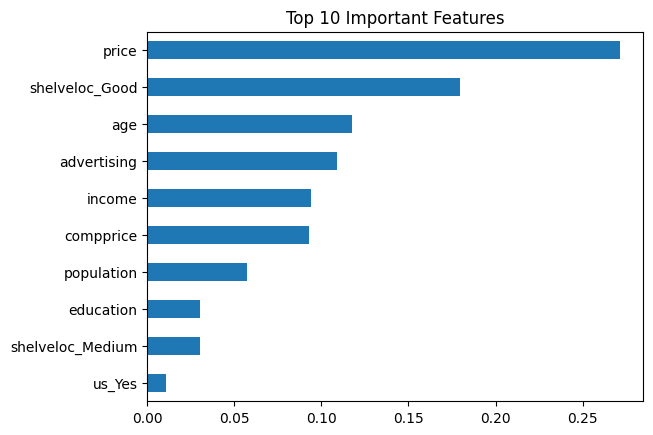

In [63]:
feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.savefig('feature_importance.png')
plt.show()